In [6]:
import pandas as pd
import json

In [4]:
def read_clue_json(path):
    """Read json file in CLUE dataset
    """
    lines = []
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            line = json.loads(line.strip())
            text = line['text']
            label_entities = line.get('label', None)
            label = ['O'] * len(text)
            if label_entities is not None:
                for key, value in label_entities.items():
                    for sub_name, sub_index in value.items():
                        for start_index, end_index in sub_index:
                            assert text[start_index:end_index + 1] == sub_name
                            label[start_index] = 'B-' + key
                            label[start_index + 1:end_index + 1] = ['I-' + key] * (len(sub_name) - 1)
            lines.append({"text": text, "label": label})
    return lines

(array([  44.,  204.,  411.,  667.,  505.,  607., 1019., 1885., 2707.,
        2699.]),
 array([ 2. ,  6.8, 11.6, 16.4, 21.2, 26. , 30.8, 35.6, 40.4, 45.2, 50. ]),
 <BarContainer object of 10 artists>)

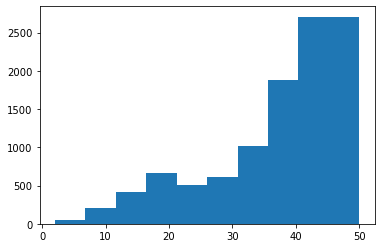

In [7]:
import matplotlib.pyplot as plt
file_path = r'D:\DevelopmentProgress\Project_VSCode\deeplearning\src\task\IE\Pipleline\NER\Bert+LSTM+CRF\pytorch-NER\clue\train.json'
lines = read_clue_json(file_path)
texts = []
for line in lines:
    texts.append(line['text'])

# 绘制texts包含词语数量的直方图
plt.hist(list(map(len, texts)))

<AxesSubplot:>

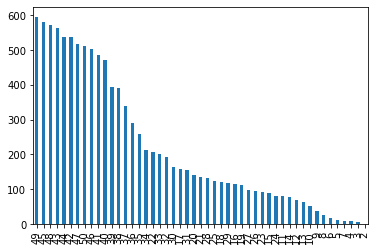

In [8]:
# 统计texts中的词语数量占比
texts_len = list(map(len, texts))
texts_len_count = pd.value_counts(texts_len)
texts_len_count.plot(kind='bar')

In [9]:
texts_len_count

49    595
45    581
48    571
43    564
44    538
42    537
47    516
50    513
46    504
41    487
40    471
39    395
38    391
37    338
36    290
35    259
34    213
22    208
33    200
32    193
30    165
17    159
31    154
20    141
21    134
28    133
25    124
18    121
29    117
16    114
19    112
27     97
26     95
23     91
15     89
24     82
11     80
14     77
12     69
13     62
10     51
9      37
8      26
6      16
5      12
7      10
4       8
3       7
2       1
dtype: int64